In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [311]:
athletes = pd.read_csv("athlete_events.csv")
noc_region = pd.read_csv("noc_regions.csv")
athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [312]:
noc_region.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [313]:
athletes_df = athletes.merge(noc_region, how = 'left', on = 'NOC')
athletes_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [314]:
print(athletes.shape)
print(athletes_df.shape)

(271116, 15)
(271116, 17)


In [315]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


### Descriptive Statistics

In [316]:
athletes_df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783,270746,5039
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3,205,21
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372,18853,2583
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
athletes_df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

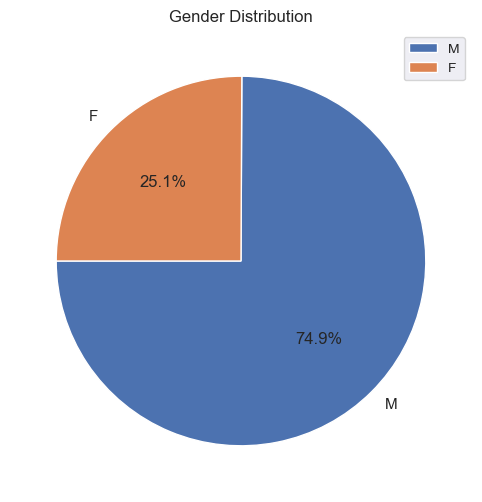

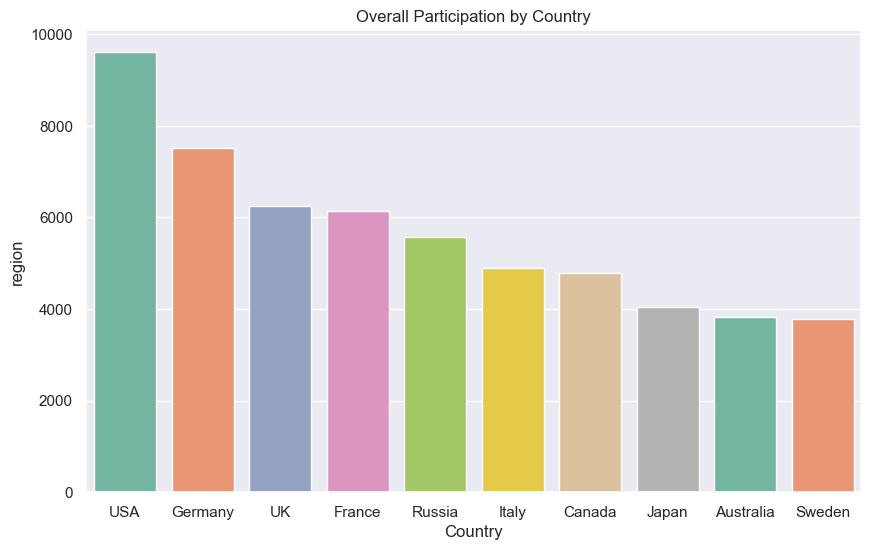

In [318]:
def_df = athletes_df.drop_duplicates(subset=['Name'])
genders = def_df['Sex'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=180);

top_10_countries = def_df.region.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Overall Participation by Country')
plt.xlabel("Country")
plt.ylabel("Numbers of Athletes")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set2');

Text(0.5, 1.0, 'Women Participation')

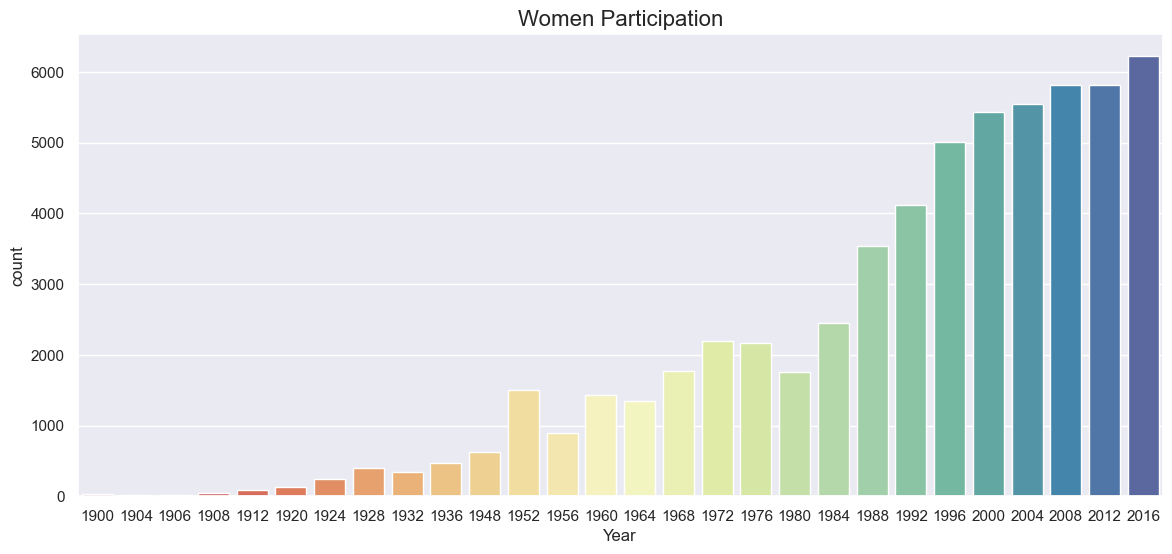

In [319]:
female_participants =athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex','Year']]
                                                           
female_participants = female_participants.groupby('Year').count().reset_index()
womenOlympics = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
sns.countplot(x='Year', data=womenOlympics, palette="Spectral")
plt.title("Women Participation", fontsize=16)

Text(0.5, 1.0, 'Men Participation')

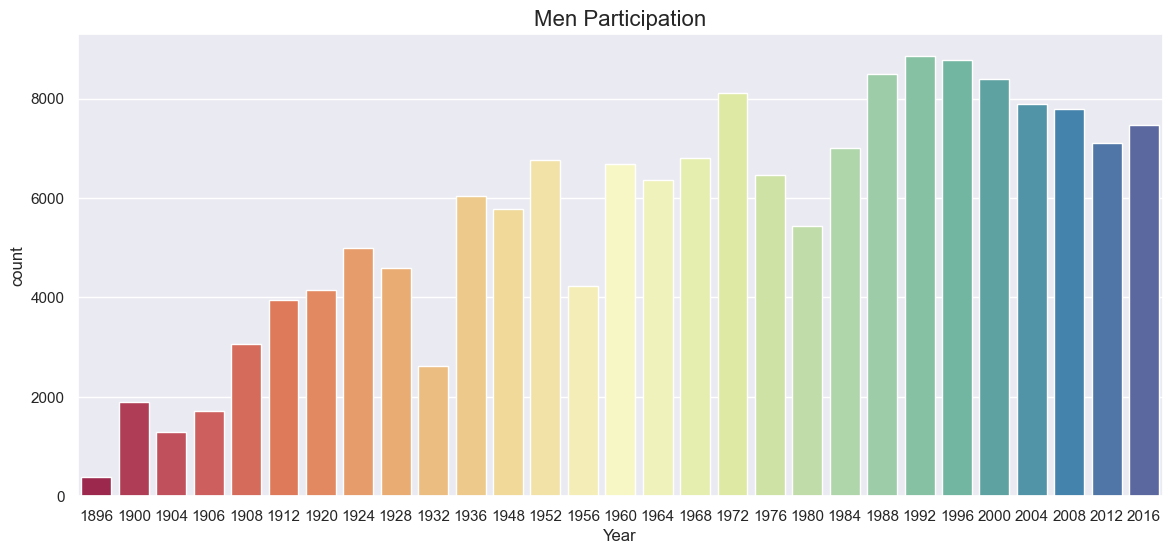

In [320]:
male_participants =athletes_df[(athletes_df.Sex=='M') & (athletes_df.Season=='Summer')][['Sex','Year']]
                                                           
male_participants = male_participants.groupby('Year').count().reset_index()
menOlympics = athletes_df[(athletes_df.Sex == 'M') & (athletes_df.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
sns.countplot(x='Year', data=menOlympics, palette="Spectral")
plt.title("Men Participation", fontsize=16)

In [321]:
cats = pd.qcut(athletes_df['Age'], 10, precision=0)
agegrp = pd.value_counts(cats)

Text(0.5, 1.0, 'Age Distribution ')

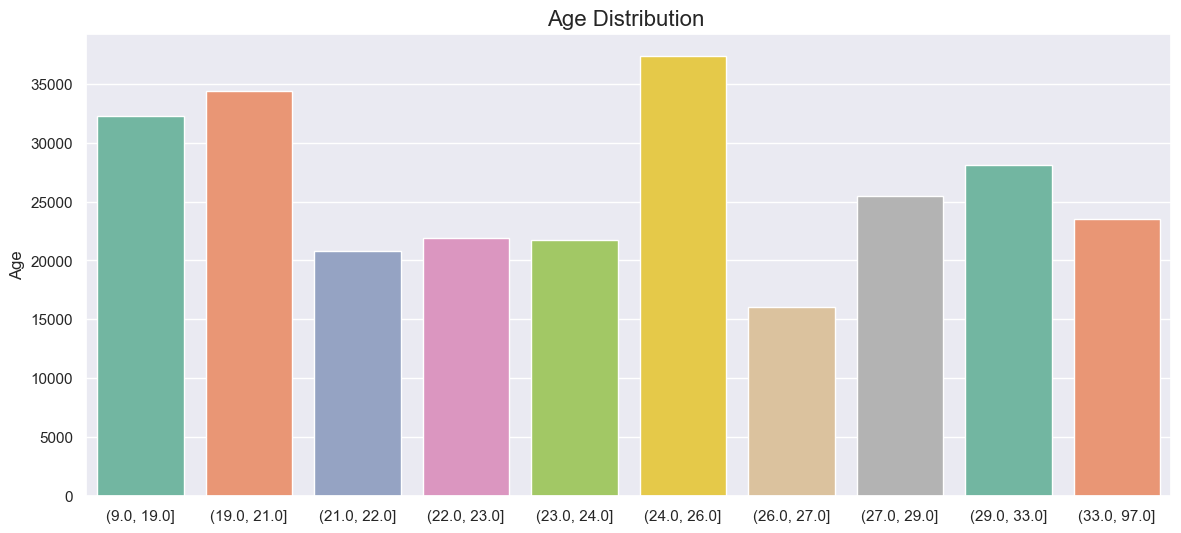

In [322]:
plt.figure(figsize=(14,6))
sns.barplot(x=agegrp.index, y=agegrp, palette = 'Set2');
plt.title("Age Distribution ", fontsize=16)

In [323]:
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

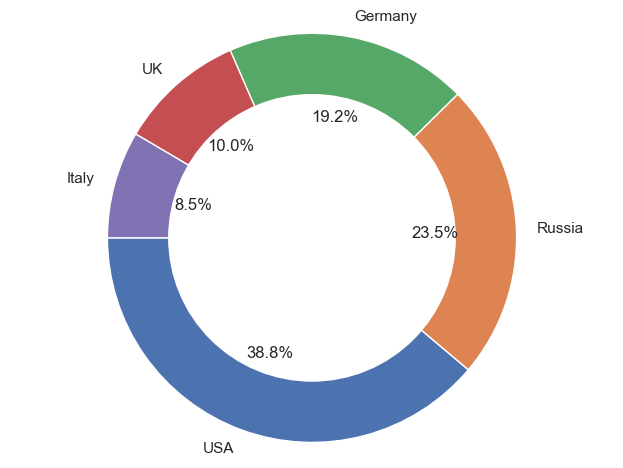

In [355]:
goldMedals = athletes_df[(athletes_df.Medal == 'Gold')]
totalGoldMedals = goldMedals['region'].value_counts().reset_index(name='Medal').head(5)

#g = sns.catplot(x="index", y="Medal", data=totalGoldMedals, height=9, kind="bar", palette = "rocket")
#g.despine(left=True)
#g.set_xlabels("Top 10 countries")
#g.set_ylabels("Number of Medals")
#plt.title('Gold Medals per Country')

fig1, ax1 = plt.subplots()

ax1.pie(totalGoldMedals['Medal'], labels = totalGoldMedals['index'], autopct='%1.1f%%', startangle=180,);

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Ranking Athletes by total medals')

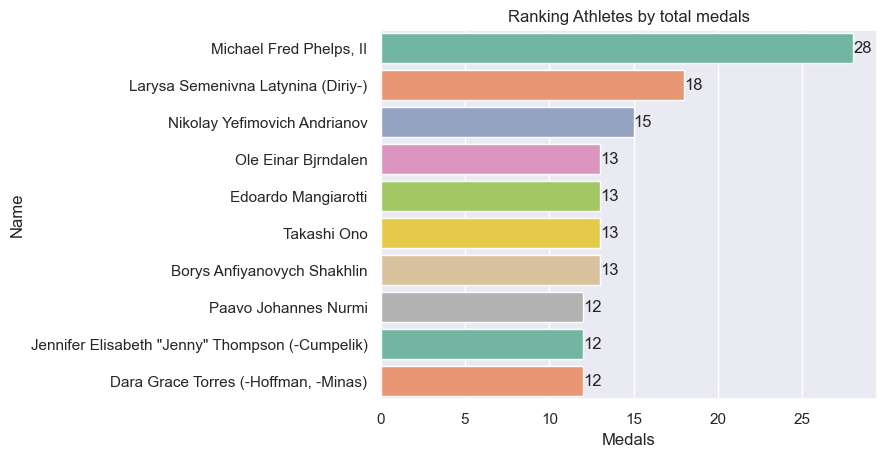

In [325]:
Medals = athletes_df[(athletes_df.Medal.notnull())]
MedalsPerPlayer = Medals['Name'].value_counts().reset_index(name='Medals').head(10)

MedalsPerPlayer = MedalsPerPlayer.rename(columns={'index': 'Name', 'Medals': 'Medals'})
ax = sns.barplot(x=MedalsPerPlayer['Medals'], y=MedalsPerPlayer['Name'], palette = 'Set2', orient = 'h');
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Ranking Athletes by total medals')

Text(0.5, 1.0, 'Ranking Sports by Gold Medals')

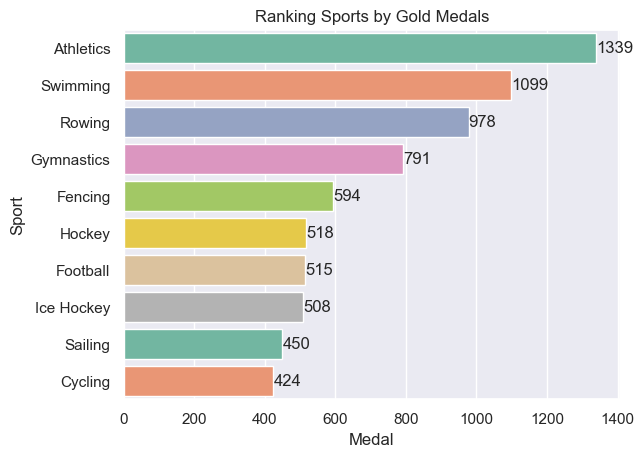

In [326]:
sports = goldMedals.groupby('Sport').count().reset_index().sort_values(by=['Medal'],ascending=False).head(10)

ax = sns.barplot(x=sports['Medal'], y=sports['Sport'], palette = 'Set2', orient = 'h');
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Ranking Sports by Gold Medals')

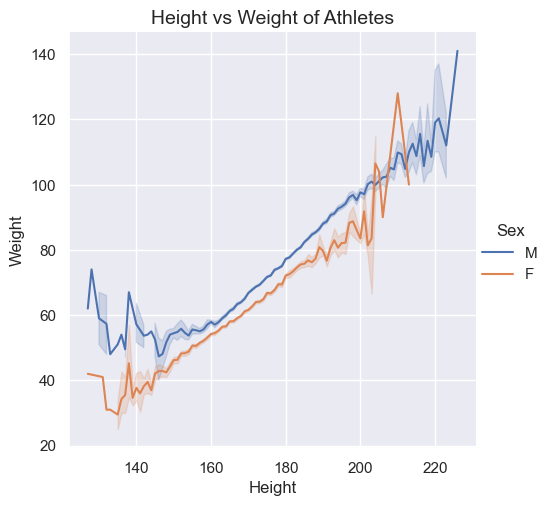

In [327]:
def_df['Sport'].value_counts()

axiss = sns.relplot(data=def_df, x="Height", y="Weight", hue="Sex",kind="line")
plt.title("Height vs Weight of Athletes", fontsize = 14)
axiss

In [ ]:
def_df.head(2)

C:\Users\Ma\AppData\Local\Temp\ipykernel_12924\2579915542.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Medals per Country')

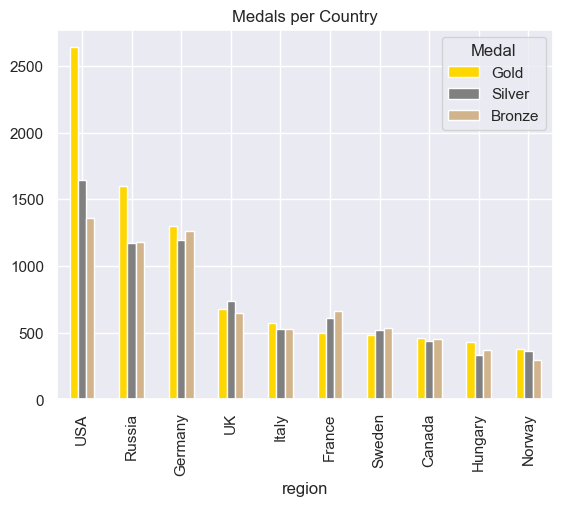

In [328]:
MMedals = athletes_df[['Medal', 'region']]
MMedals['Nt']=athletes_df['Medal']
#totalMedals = MMedals.groupby('region').count().reset_index()
totalMedals = pd.pivot_table(MMedals, index=['region'], columns='Medal', values='Nt', aggfunc='count')
totalMedals = totalMedals.sort_values(by=['Gold'],ascending=False).head(10)


totalMedalss = totalMedals[['Gold','Silver','Bronze']]
totalMedalss.plot(kind='bar', color=['gold', 'gray', 'tan'])
plt.title('Medals per Country')

Text(0.5, 1.0, 'Michael Phelps Medals')

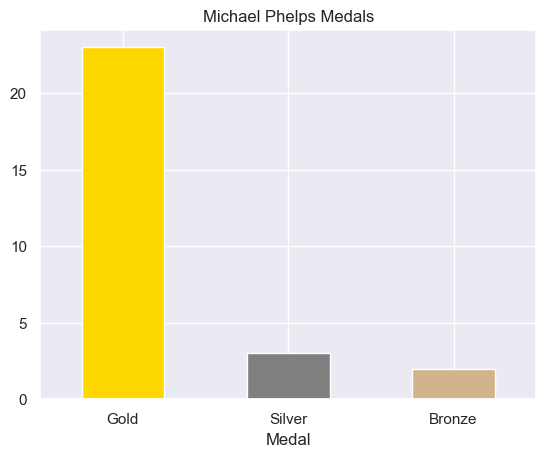

In [336]:
Michael_Phelps_Medals = athletes_df[(athletes_df.Name == 'Michael Fred Phelps, II')]
Michael_Phelps_Medals = Michael_Phelps_Medals.groupby('Medal').count()
Michael_Phelps_Medals = Michael_Phelps_Medals['Name'].sort_values(ascending=False)
Michael_Phelps_Medals.plot(kind='bar', color=['gold', 'gray', 'tan'])
plt.xticks(rotation='horizontal')
plt.title('Michael Phelps Medals')


In [379]:
def_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246


C:\Users\Ma\AppData\Local\Temp\ipykernel_12924\217260632.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



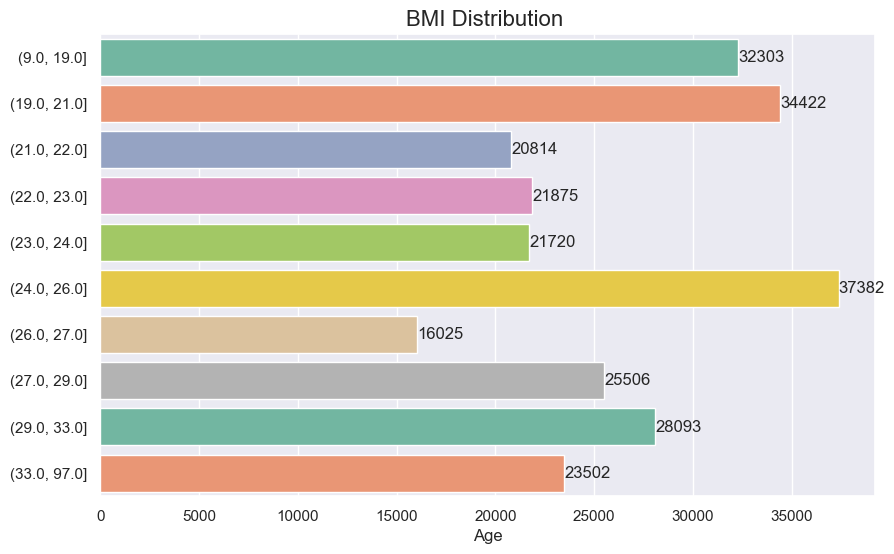

In [377]:
def_df['BMI'] = def_df['Weight']/((def_df['Height']/100)*(def_df['Height']/100))
frfr = def_df['BMI']


fig, ax = plt.subplots(figsize=(10, 6))
catsfr = pd.qcut(frfr, 10, precision=0)
frfr = pd.value_counts(cats)
ax = sns.barplot(x=frfr, y=frfr.index, palette = 'Set2', orient = 'h');
plt.title("BMI Distribution ", fontsize=16)
for i in ax.containers:
    ax.bar_label(i,)